In [363]:
import yfinance as yf
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as ply
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [364]:
ADA_C = yf.download("ADA-USD", start="2021-04-01", end="2022-04-01")

[*********************100%***********************]  1 of 1 completed


In [365]:
ADA_C.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-31,1.213675,1.213675,1.167720,1.193264,1.193264,3190463749
2021-04-01,1.193553,1.207719,1.184130,1.189244,1.189244,2309789364
2021-04-02,1.189208,1.245915,1.187607,1.196509,1.196509,2909026267
2021-04-03,1.196326,1.244183,1.171635,1.173277,1.173277,3355350115
2021-04-04,1.172973,1.199748,1.166279,1.191420,1.191420,2166855014


In [366]:
ADA_C.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-27,1.151006,1.183395,1.108125,1.182148,1.182148,1322194562
2022-03-28,1.182334,1.242865,1.162468,1.170184,1.170184,2304056098
2022-03-29,1.169285,1.239358,1.169033,1.191112,1.191112,1761798381
2022-03-30,1.190980,1.216669,1.167608,1.190385,1.190385,1424442312
2022-03-31,1.190299,1.226320,1.137162,1.141851,1.141851,1745903089


In [367]:
ADA_C.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,366.00,366.00,366.00,366.00,366.00,3.660000e+02
mean,1.57,1.63,1.50,1.57,1.57,3.195617e+09
std,0.51,0.53,0.49,0.51,0.51,2.467371e+09
min,0.79,0.80,0.75,0.79,0.79,4.936061e+08
25%,1.20,1.25,1.17,1.20,1.20,1.557324e+09
50%,1.40,1.45,1.33,1.40,1.40,2.325452e+09
75%,1.99,2.04,1.92,1.99,1.99,4.071723e+09
max,2.97,3.10,2.91,2.97,2.97,1.631379e+10


In [368]:
ADA_C['Adj Close'].head()

Date
2021-03-31    1.193264
2021-04-01    1.189244
2021-04-02    1.196509
2021-04-03    1.173277
2021-04-04    1.191420
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

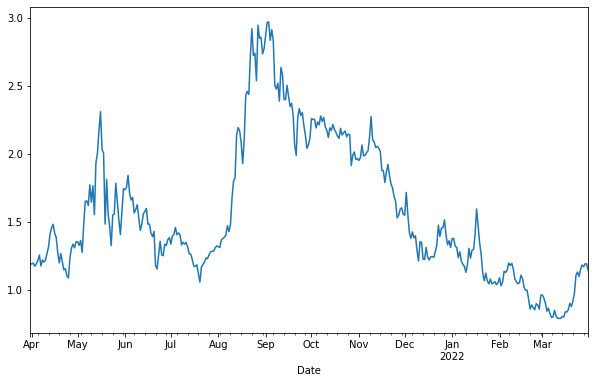

In [369]:
ADA_C['Adj Close'].plot(figsize=(10,6))

In [370]:
# Calculating annualised volatiltiy 

In [371]:
normal_return = []
for i in range(0,len(ADA_C)-1):
    adjclose_yesterday = ADA_C.iloc[i]['Adj Close']
    adjclose_today = ADA_C.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.0033688904020690072,
 0.006108899046942383,
 -0.019416471680659,
 0.015463473926102204,
 0.019204040680964405]

In [372]:
log_return = []
for i in range(0,len(ADA_C)-1):
    adjclose_yesterday = ADA_C.iloc[i]['Adj Close']
    adjclose_today = ADA_C.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.0033745778906158494,
 0.006090315368632335,
 -0.01960744745927552,
 0.015345132830218848,
 0.019021970389288764]

In [373]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.55530815 and its annulized volatility is 1.10197311


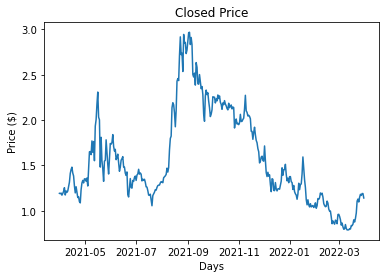

In [374]:
fig = ply.figure()
ply.plot(ADA_C['Close'])
ply.xlabel('Days')
ply.ylabel('Price ($)')
ply.title('Closed Price');

In [375]:
ADA_C_price = ADA_C['Adj Close'][-1]
print('The spot price is', round(ADA_C_price,2))

The spot price is 1.14


In [376]:
## 2. Option Pricing 

In [377]:
# a. Binomial Tree

In [378]:
S0 =1.14               # spot price 
K = 1.20                # strike or exercise price (i assumed this price as i feel it's closer to the spot price)
T = 30.0/365.0          # maturity period of the asset (30 days have been chosen for the maturity of the assets)
r = 0.0168              # U.S.risk free rate (the risk free rate was was 1.68% which is 0.0168 (bloomberg on 01/04/2022)
sig = 1.1020            # diffusion coefficient or volatility as derived above
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [379]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u        

In [380]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [381]:
S

array([[1.14      , 1.36811325, 1.64187181, 1.97040928],
       [0.        , 0.94992136, 1.14      , 1.36811325],
       [0.        , 0.        , 0.79153561, 0.94992136],
       [0.        , 0.        , 0.        , 0.65955841]])

In [382]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.45577993585526083

In [383]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25007864],
       [0.        , 0.        , 0.        , 0.54044159]])

In [384]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.18812591, 0.07399901, 0.        , 0.        ],
       [0.        , 0.28386542, 0.13603518, 0.        ],
       [0.        , 0.        , 0.40791219, 0.25007864],
       [0.        , 0.        , 0.        , 0.54044159]])

In [385]:
print('European ' + payoff, str( V[0,0]))

European put 0.18812591177473684


In [386]:
# b. Monte Carlo Simulation

In [387]:
def mcs_simulation_np(p):
    M = p
    I = p      ## I number of simulation
    dt = T / M ## M number of time step for each simulation
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [388]:
T = 30.0/365.0
r = 0.0168
sigma = 1.1020  
S0 = 1.14
K = 1.20

In [389]:
S = mcs_simulation_np(10000)

In [390]:
S = np.transpose(S)
S

array([[1.14      , 1.14412632, 1.14038808, ..., 1.00640799, 1.0111285 ,
        1.01020475],
       [1.14      , 1.13551556, 1.14040886, ..., 0.97156984, 0.9721959 ,
        0.966611  ],
       [1.14      , 1.13764478, 1.13943065, ..., 1.60665132, 1.60633938,
        1.61262458],
       ...,
       [1.14      , 1.13863103, 1.14250198, ..., 1.39808962, 1.39642027,
        1.39065417],
       [1.14      , 1.14221181, 1.14439257, ..., 0.5485182 , 0.55192265,
        0.55179165],
       [1.14      , 1.13636567, 1.13356785, ..., 0.61214267, 0.61054977,
        0.61096915]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

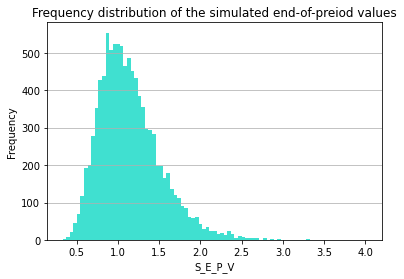

In [391]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#40E0D0',alpha=1, rwidth=2.5)

plt.grid(axis='y', alpha=0.95)
plt.xlabel('S_E_P_V')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [392]:
p = np.mean(np.maximum(K - S[:,-1],0)) * np.exp(-r * T)
print('European put', str(p))

European put 0.17833086779813778


In [393]:
# c. Black Scholes Model

In [394]:
def EuroOption_BSM(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [395]:
S= 1.14
K = 1.20
T = 30.0/365.0
r = 0.0168
sig = 1.1020

In [396]:
put = EuroOption_BSM(S, K, T, r, sig, 'put')
print('The Black Scholes put price is', round(put, 4))

The Black Scholes put price is 0.1777


In [397]:
## Greeks

In [398]:
# Delta

In [399]:
def delta(S, K, T, r, q, sig, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [400]:
delta(1.14, 1.20, 30.0/365.0, 0.0168, 0, 1.1020, 'call')  

0.499993106985997

In [401]:
delta(1.14, 1.20, 30.0/365.0, 0.0168, 0, 1.1020, 'put')  

-0.5000068930140029

In [402]:
S = np.linspace(0.16, 1.24, 45)
T = np.linspace(0.5, 2, 45)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 1.20, T[i], 0.0168, 0.00, 1.1020, 'put')

C:\Users\user\AppData\Local\Temp/ipykernel_11348/2451658424.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


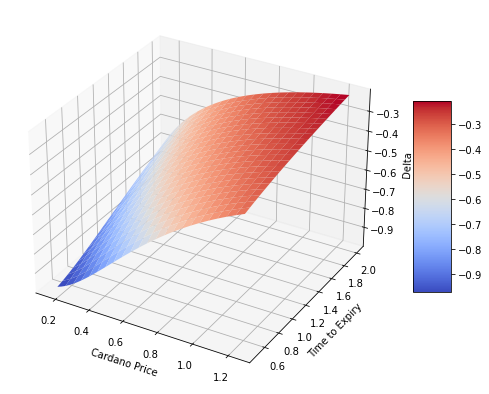

In [403]:
fig = plt.figure(figsize=(9, 7))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cardano Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [404]:
# Gamma

In [405]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [406]:
gamma(1.14, 1.20, 30.0/365.0, 0.0168, 0, 1.1020, 'put')

1.10613909316858

In [407]:
gamma(1.14, 1.20, 30.0/365.0, 0.0168, 0, 1.1020, 'call')

1.10613909316858

In [408]:
S = np.linspace(0.16, 1.24, 45)
T = np.linspace(0.5, 2, 45)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 1.20, T[i], 0.0168, 0.0, 1.1020, 'put')

C:\Users\user\AppData\Local\Temp/ipykernel_11348/3068588501.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


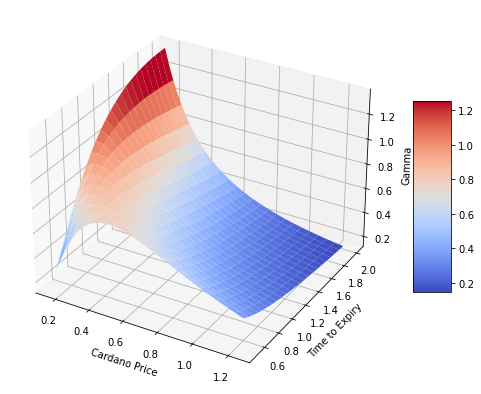

In [409]:
fig = plt.figure(figsize=(9, 7))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cardano Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [410]:
# Theta 

In [411]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [412]:
S = np.linspace(0.16, 1.24, 45)
T = np.linspace(0.5, 2, 45)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 1.20, T[i], 0.0168, 0, 1.1020, 'put')

In [413]:
theta(1.14, 1.20, 30.0/365.0, 0.0168, 0, 1.1020, 'put')

0.8866443704310275

In [414]:
theta(1.14, 1.20, 30.0/365.0, 0.0168, 0, 1.1020, 'call')

0.8816523907523176

C:\Users\user\AppData\Local\Temp/ipykernel_11348/4134647765.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


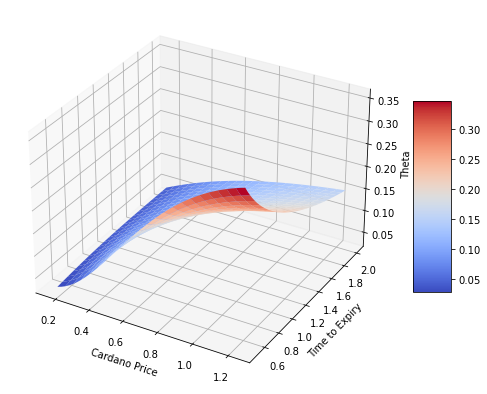

In [415]:
fig = plt.figure(figsize=(9, 7))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cardano Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [416]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [417]:
S = np.linspace(0.16, 1.24, 45)
T = np.linspace(0.5, 2, 45)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 1.20, T[i], 0.0168, 0, 1.1020, 'put')

In [418]:
rho(1.14, 1.20, 30.0/365.0, 0.0168, 0.00, 1.1020, 'call')

0.03703571957389726

In [419]:
rho(1.14, 1.20, 30.0/365.0, 0.0168, 0.00, 1.1020, 'put')

-0.06145832074175417

In [420]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 130, T[i], 0.0162, 0.00, 1.09, 'put')

C:\Users\user\AppData\Local\Temp/ipykernel_11348/747863432.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


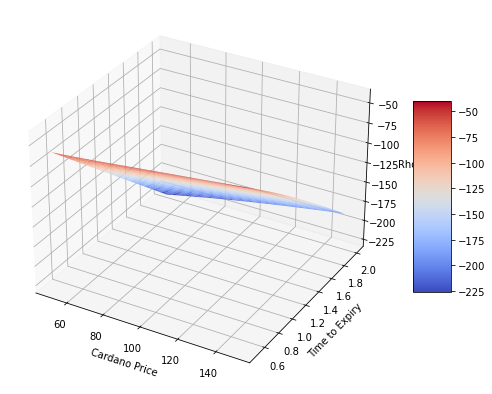

In [421]:
fig = plt.figure(figsize=(9, 7))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cardano Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [422]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [423]:
vega(1.14, 1.20, 30.0/365.0, 0.0168, 0.00, 1.1020, 'put')

0.1303854445970832

In [424]:
vega(1.14, 1.20, 30.0/365.0, 0.0168, 0.00, 1.1020, 'call')

0.1303854445970832

In [425]:
S = np.linspace(0.16, 1.24, 45)
T = np.linspace(0.5, 2, 45)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 130, T[i], 0.0162, 0.00, 1.09, 'put')

C:\Users\user\AppData\Local\Temp/ipykernel_11348/409896807.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


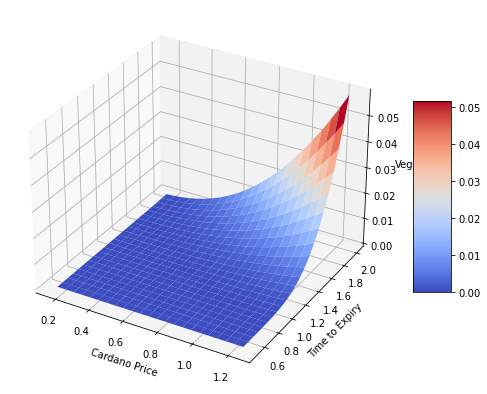

In [426]:
fig = plt.figure(figsize=(9, 7))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cardano Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);